# Linear Regression

#### V.VISHNU DUT

### 16BCE1103

# Linear Regression:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X) 
            

Importing Dataset

In [3]:
col_Names=["area", "perimeter", "compactness", "lengthOfKernel", "widthOfKernel", "asymmetryCoefficient", "lengthOfKernelGroove", "TypeOfWheatSeed"]
data = pd.read_csv("seeds_dataset.csv",names=col_Names, header = None)

In [4]:
data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
data.isnull().any()

area                    False
perimeter               False
compactness             False
lengthOfKernel          False
widthOfKernel           False
asymmetryCoefficient    False
lengthOfKernelGroove    False
TypeOfWheatSeed         False
dtype: bool

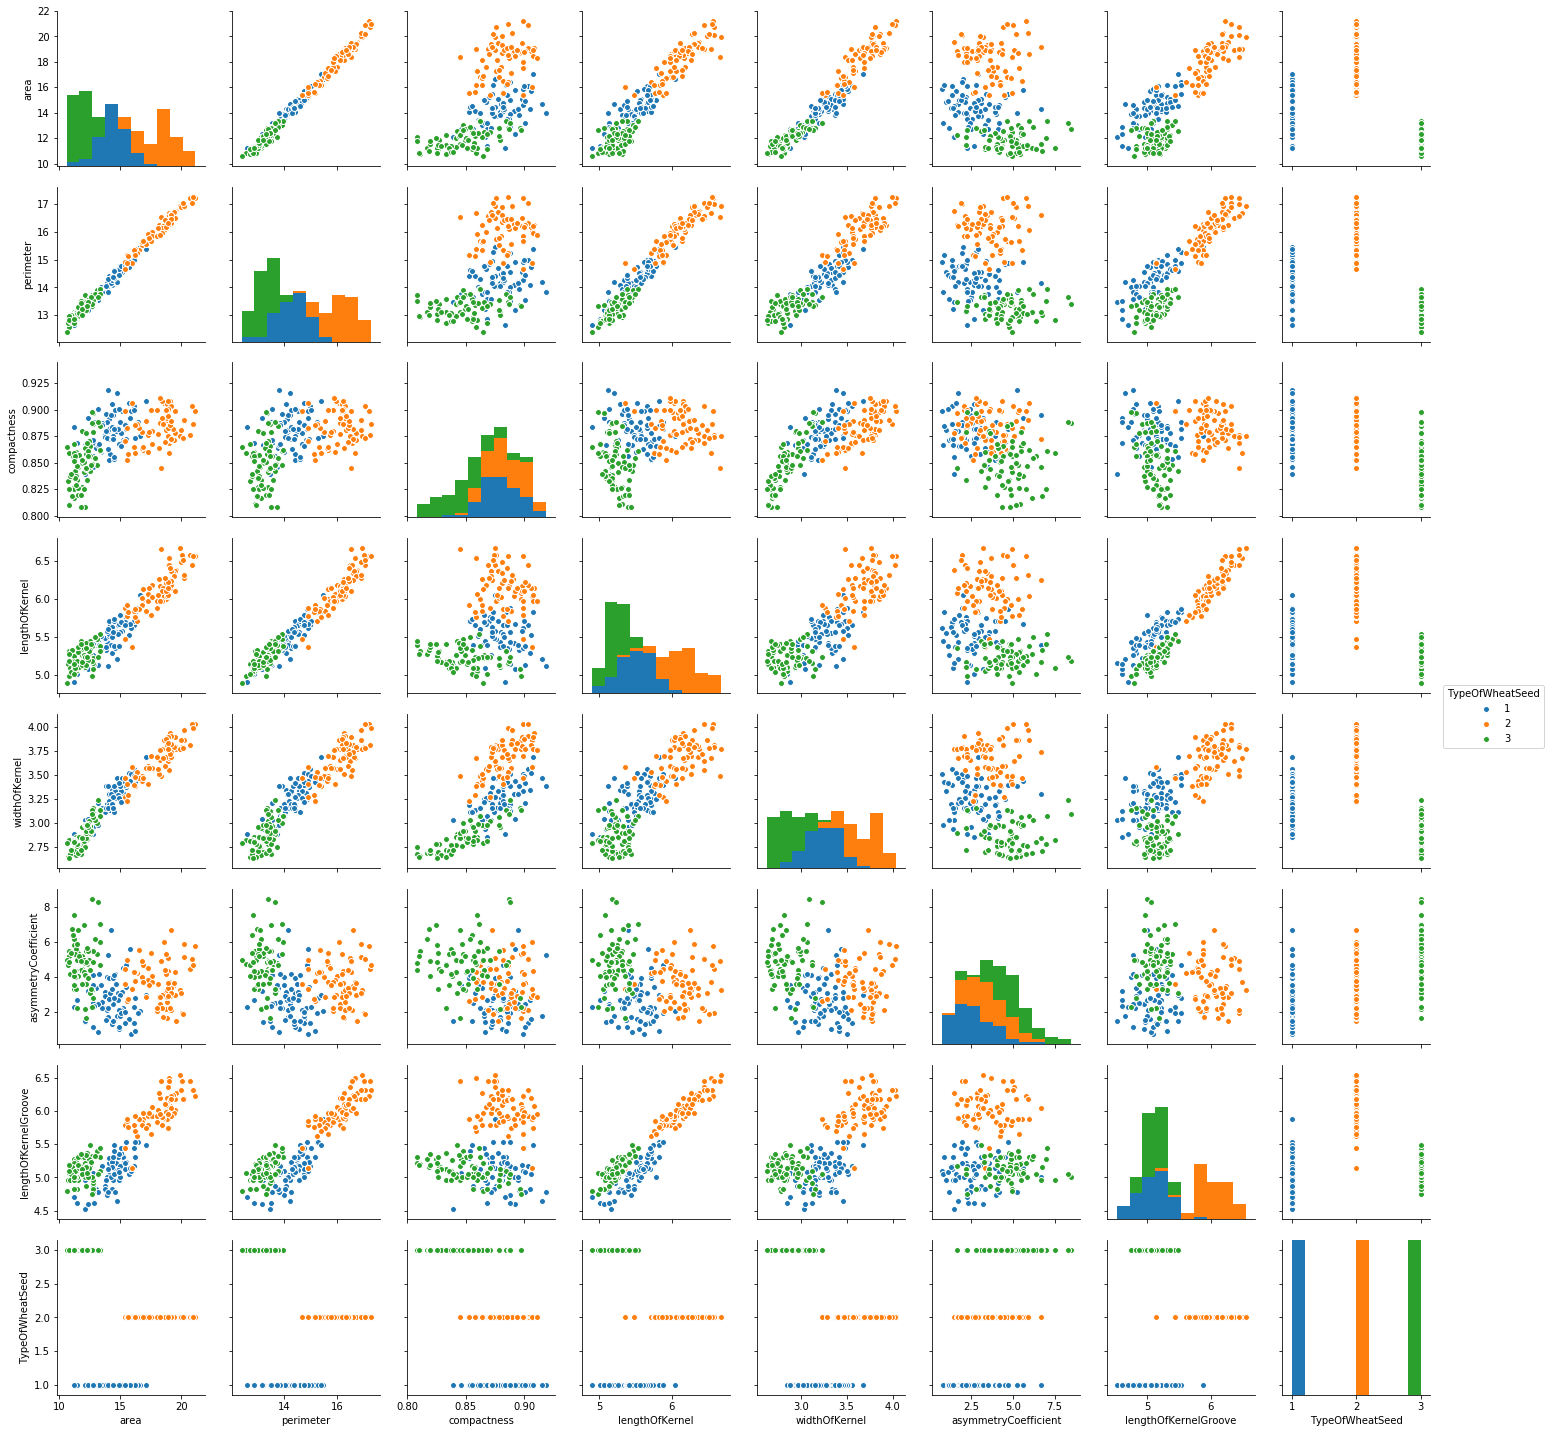

In [6]:
sns.pairplot(data, hue = "TypeOfWheatSeed")

For our linear regression model we'll try to use Length of kernel and Area as the map feels to have a linear regression like model to it from the plot above 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = data[["lengthOfKernel"]].values

In [10]:
Y = data[["area"]].values

In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [12]:
x_std = sc_x.fit_transform(X)

In [13]:
y_std = sc_y.fit_transform(Y)

In [14]:
lr = LinearRegressionGD()

In [ ]:
lr.fit(x_std,y_std)

In [16]:
def lin_regplot(X, y, model): 
    plt.scatter(X, y, c='blue')     
    plt.plot(X, model.predict(X), color='red')     
    return None

In [ ]:
# # Normalize features using min-max scaling.
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)
# X_norm = mms.transform(X)
# Y_norm = mms.fit_transform(Y)

# Now Linear Regression with sklearn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [23]:
data.shape

(210, 8)

In [24]:
data.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


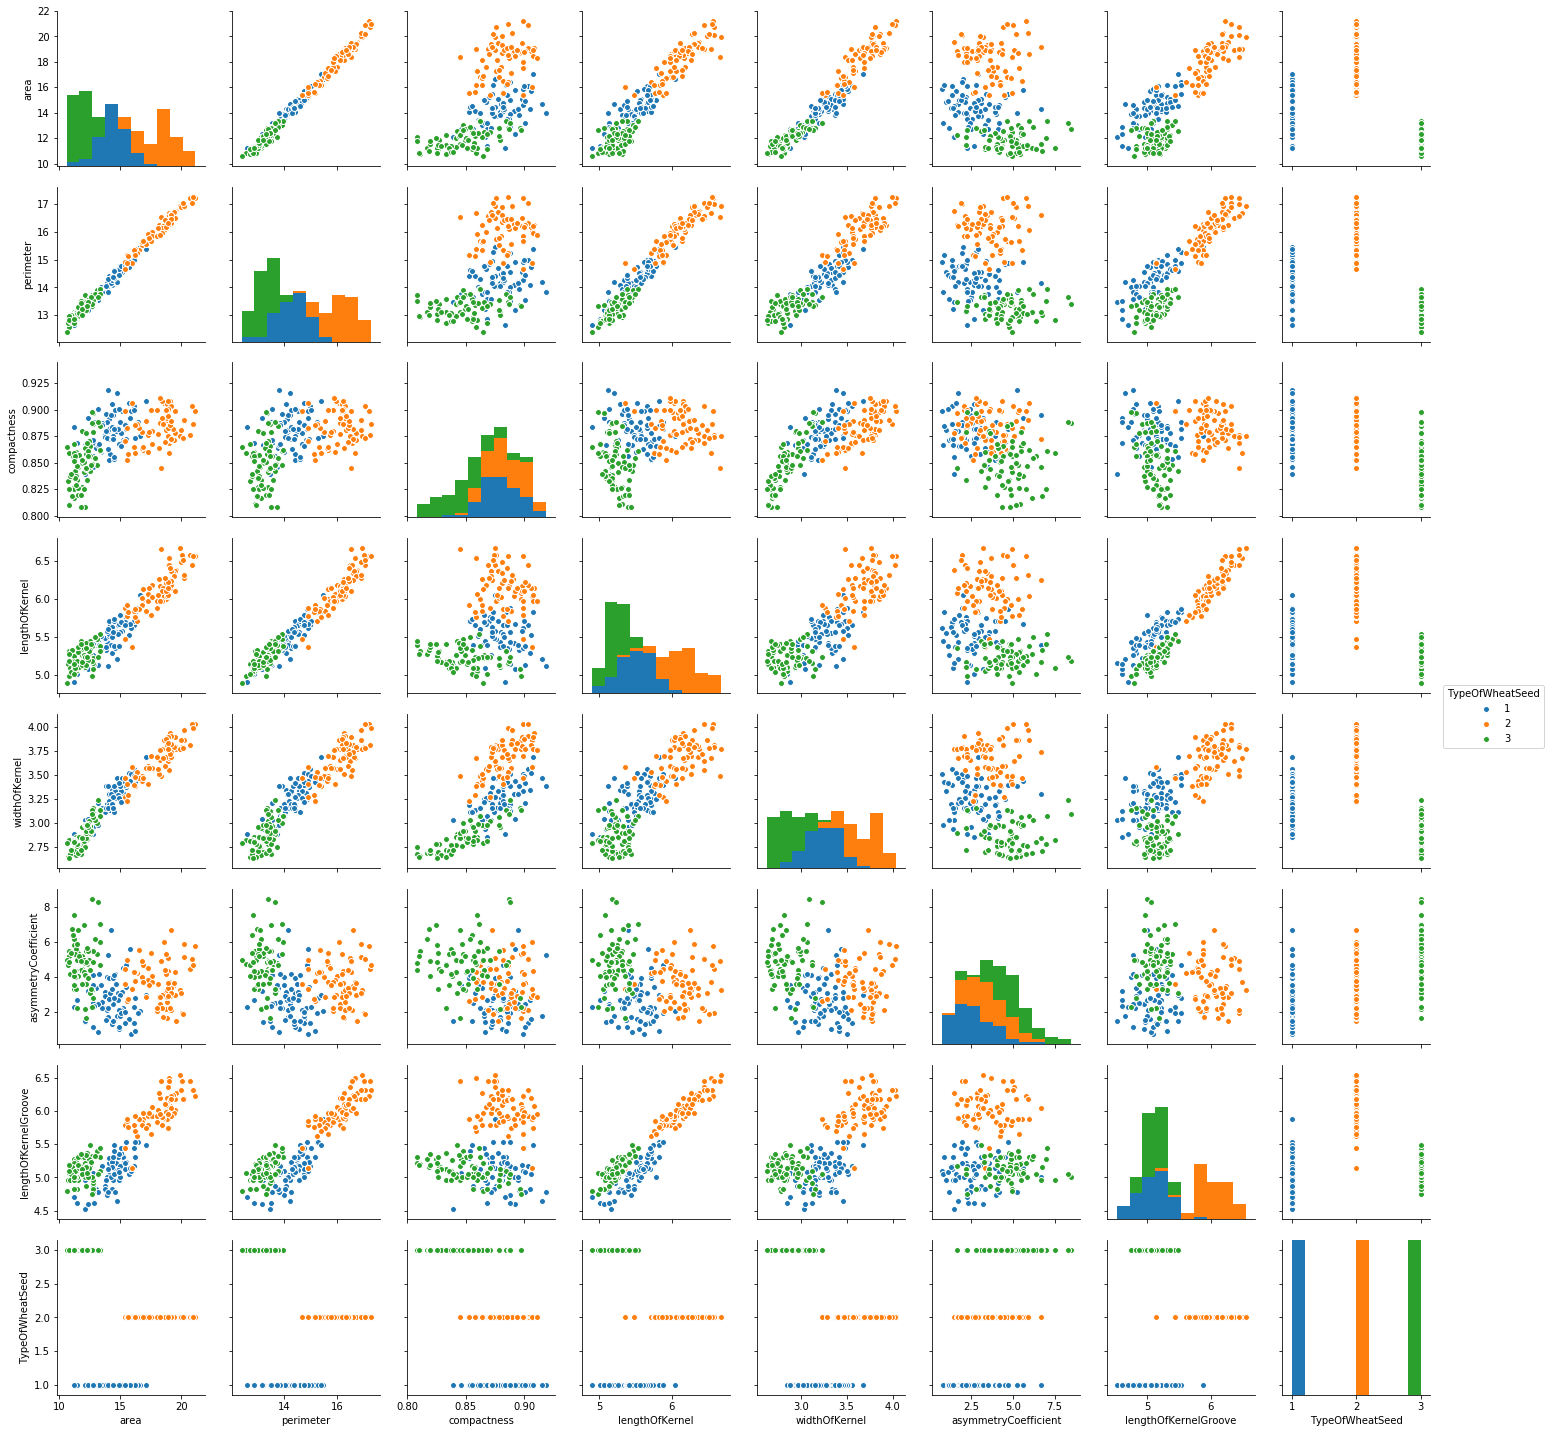

In [25]:
sns.pairplot(data, hue = "TypeOfWheatSeed")

Again we try to find a linear regression pattern here 

This time we use lengthOfKernel and perimeter

In [27]:
X = data[["lengthOfKernel"]].values

In [41]:
Y = data["perimeter"].values

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

Now since we have seperated the data into training set and test set we can now finally use LinearRegression  from sklearn to train the model

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print(regressor.intercept_)

-1.5299264970156887


In [45]:
print(regressor.coef_) 

[2.85699554]


In [46]:
y_pred = regressor.predict(X_test)

This y_pred contains all the predicted values for each of the values in X_test 


y_pred is an numpy array also

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.2940974554994433
Mean Squared Error: 0.15001651917762993
Root Mean Squared Error: 0.3873196602002407


Now we need to find out how well our model did with the test data so we need to check the accuracy

In [48]:
from sklearn.metrics import accuracy_score

In [54]:
y_pred

array([14.00927223, 15.25492228, 14.42639358, 13.85785147, 13.00932379,
       16.70913301, 15.7577535 , 14.93208179, 17.27196113, 13.25502541,
       13.82928151, 12.90647195, 14.797803  , 12.88647298, 16.58628221,
       15.85203435, 13.42930214, 15.13207148, 14.55495838, 13.34073527,
       13.68357474, 13.75785662, 13.95498932, 14.76066206, 16.38914951,
       14.97207973, 15.92917323, 13.79214057, 14.02355721, 13.79214057,
       15.40348605, 13.66071878, 15.13207148, 15.60633274, 13.0064668 ,
       13.55215294, 13.28645236, 16.26058471, 13.09503366, 14.11783806,
       13.01503778, 14.52067443])

In [55]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,14.02,14.009272
1,15.34,15.254922
2,14.17,14.426394
3,14.21,13.857851
4,12.82,13.009324
5,16.74,16.709133
6,16.20,15.757753
7,15.38,14.932082
8,16.99,17.271961
9,13.05,13.255025


We can see that the values we have predicted are pretty close enough 

# Multiple Linear Regression

Usually in real world examples we have more than 2 variables and my dataset "Wheat seed" is no exception 

In [56]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [57]:
data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [59]:
data.describe() 

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,TypeOfWheatSeed
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


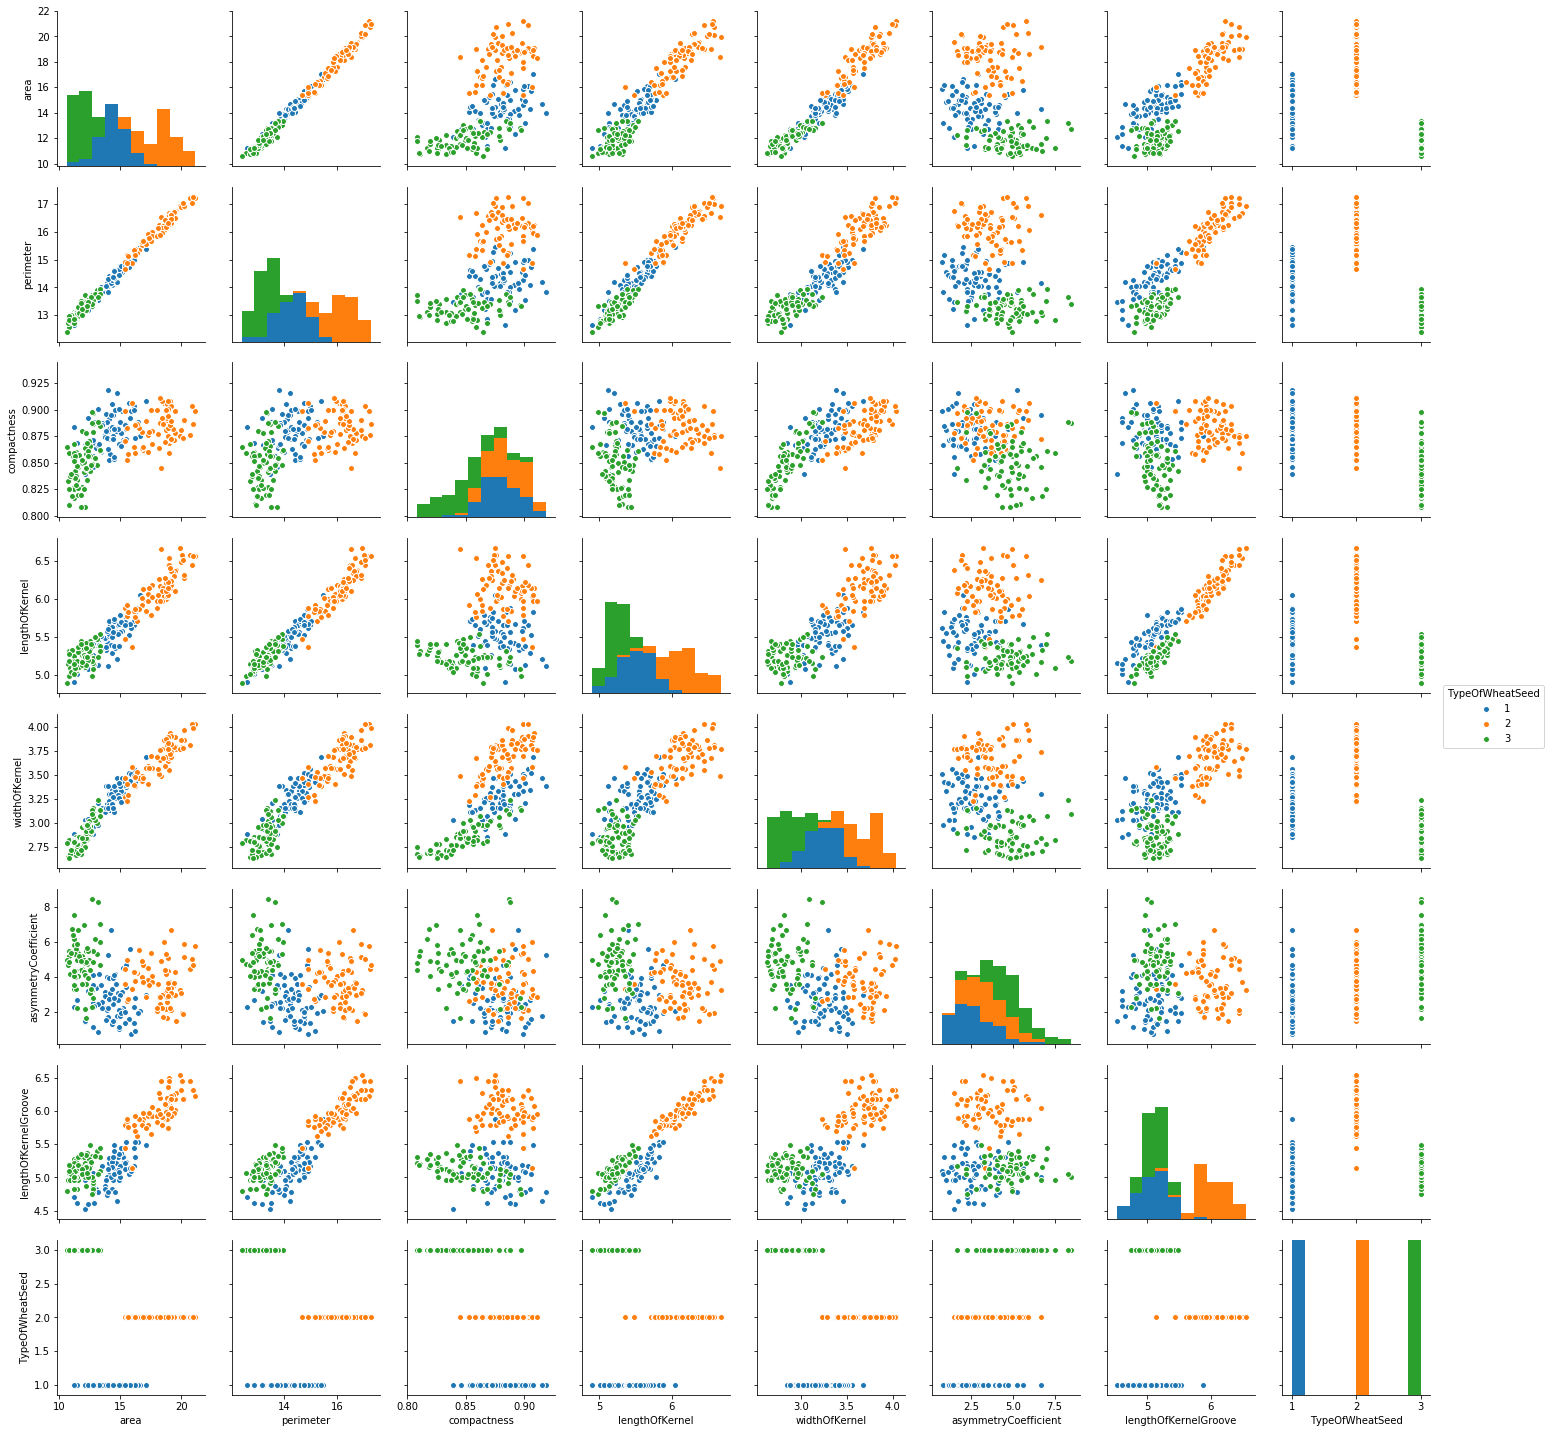

In [60]:
sns.pairplot(data, hue = "TypeOfWheatSeed")

In [61]:
X = data[["lengthOfKernelGroove", "lengthOfKernel"]]

In [64]:
y = data["TypeOfWheatSeed"]

In [65]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [66]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
y_pred = regressor.predict(X_test)  

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

In [76]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.3822779664288027
Mean Squared Error: 0.21226707483060692
Root Mean Squared Error: 0.46072451077689247


### CONCLUSION:

From this we can conclude that our Multiple Linear Regression model can predict the type of wheat seed given two attributes with error



Mean Absolute Error: 0.3822779664288027

Mean Squared Error: 0.21226707483060692

Root Mean Squared Error: 0.46072451077689247

Where as our Linear regression model predicted the Length of the kernel given the perimeter with error 

Mean Absolute Error: 0.2940974554994433

Mean Squared Error: 0.15001651917762993

Root Mean Squared Error: 0.3873196602002407

